importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About Dataset

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [3]:
df=pd.read_csv("D:\\DATASETS\\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Shape of the dataet(no of rows and columns)

In [4]:
df.shape

(48895, 16)

Info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Null value percentage on each column

In [7]:
df.isnull().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

Droping unnecessary column

In [8]:
df['last_review'].head()

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

In [9]:
df.drop('last_review',axis=1,inplace=True)

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Collecting col names that has lower than 0.05 missing values

In [11]:
cols=[i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean()>0]

In [12]:
cols

['name', 'host_name']

In [13]:
len(df[cols].dropna())/len(df)

0.9992432764086308

Droping those cols

In [14]:
df.dropna(subset=cols,inplace=True)

In [15]:
df.shape

(48858, 15)

In [16]:
df.isnull().mean()*100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.543207
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

Filling the missing value in reviews_per_month col

In [17]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [18]:
df['reviews_per_month']=df['reviews_per_month']*100

In [19]:
df['reviews_per_month']

0         21.0
1         38.0
2          NaN
3        464.0
4         10.0
         ...  
48890      NaN
48891      NaN
48892      NaN
48893      NaN
48894      NaN
Name: reviews_per_month, Length: 48858, dtype: float64

In [20]:
df['reviews_per_month'].mode()

0    2.0
Name: reviews_per_month, dtype: float64

In [21]:
df['reviews_per_month'] =df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [22]:
df['reviews_per_month']

0         21.0
1         38.0
2         72.0
3        464.0
4         10.0
         ...  
48890     72.0
48891     72.0
48892     72.0
48893     72.0
48894     72.0
Name: reviews_per_month, Length: 48858, dtype: float64

In [23]:
df['reviews_per_month'].astype(int)

0         21
1         38
2         72
3        463
4         10
        ... 
48890     72
48891     72
48892     72
48893     72
48894     72
Name: reviews_per_month, Length: 48858, dtype: int32

Removing the outliers in reviews_per_month col using IQR method

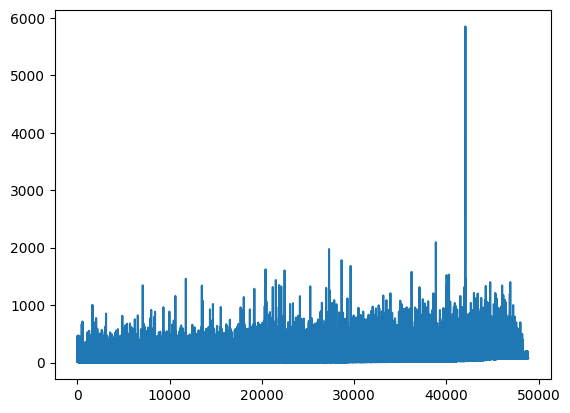

In [24]:
plt.plot(df['reviews_per_month'])

In [25]:
mean = df['reviews_per_month'].mean()
median = df['reviews_per_month'].median()

print(f'Mean: {mean}, Median: {median}')
if mean > median:
    print("Right-skewed")
elif mean < median:
    print("Left-skewed")
else:
    print("Symmetric")

Mean: 123.90349584510213, Median: 72.0
Right-skewed


C:\Users\hp\AppData\Local\Temp\ipykernel_10204\4190268020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month'])


<Axes: xlabel='reviews_per_month', ylabel='Density'>

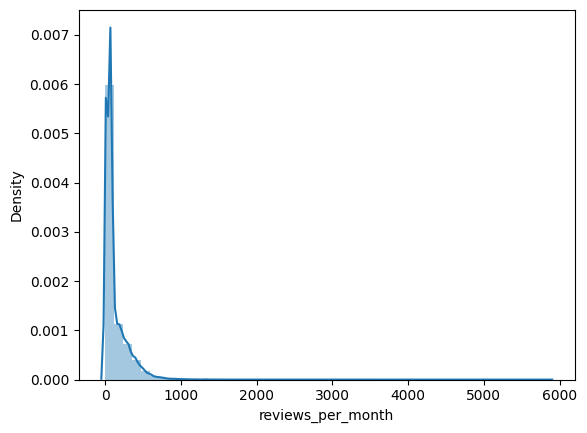

In [26]:
sns.distplot(df['reviews_per_month'])

In [27]:
percentile25 = df['reviews_per_month'].quantile(0.25)
percentile75 = df['reviews_per_month'].quantile(0.75)

In [28]:
iqr = percentile75 - percentile25

In [29]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [30]:
new_df = df.copy()

new_df['reviews_per_month'] = np.where(
    new_df['reviews_per_month'] > upper_limit,
    upper_limit,
    np.where(
        new_df['reviews_per_month'] < lower_limit,
        lower_limit,
        new_df['reviews_per_month']
    )
)

C:\Users\hp\AppData\Local\Temp\ipykernel_10204\1745438347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['reviews_per_month'])


<Axes: xlabel='reviews_per_month', ylabel='Density'>

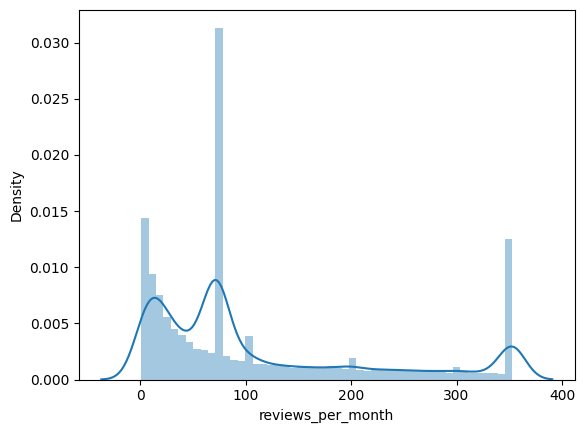

In [31]:
sns.distplot(new_df['reviews_per_month'])

In [32]:
new_df['reviews_per_month'].describe()

count    48858.000000
mean       110.743911
std        108.851477
min          1.000000
25%         28.000000
50%         72.000000
75%        158.000000
max        353.000000
Name: reviews_per_month, dtype: float64

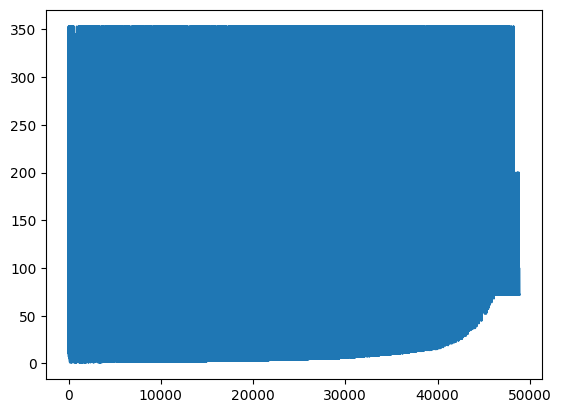

In [33]:
plt.plot(new_df['reviews_per_month'])
plt.show()

In [34]:
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,21.0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,38.0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,72.0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,353.0,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,10.0,1,0


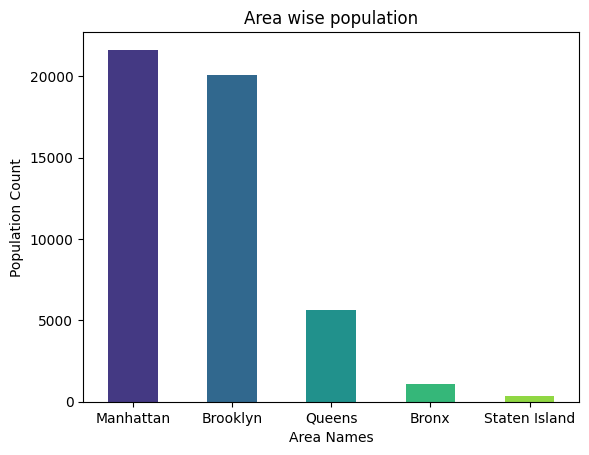

In [35]:
colors=sns.color_palette('viridis',len(new_df['neighbourhood_group'].value_counts()))
new_df['neighbourhood_group'].value_counts().plot(kind='bar',color=colors)
plt.title("Area wise population")
plt.xlabel("Area Names")
plt.ylabel("Population Count")
plt.xticks(rotation=0)
plt.show()

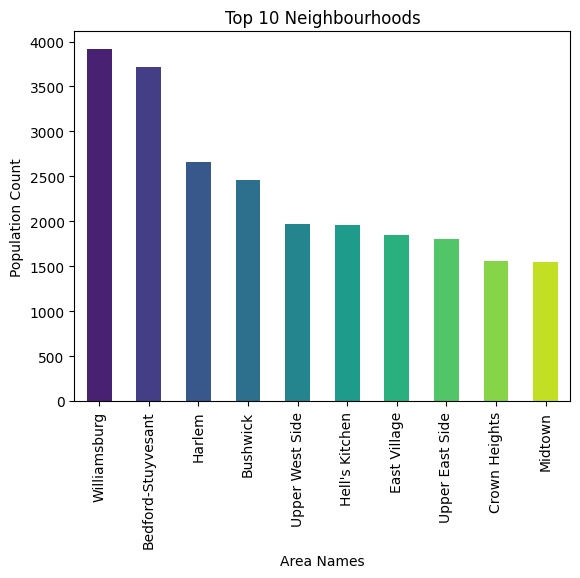

In [36]:
top_10_neighbourhoods = new_df['neighbourhood'].value_counts().head(10)
colors = sns.color_palette('viridis', len(top_10_neighbourhoods))
top_10_neighbourhoods.plot(kind='bar', color=colors)

plt.title("Top 10 Neighbourhoods")
plt.xlabel("Area Names")
plt.ylabel("Population Count")
plt.xticks(rotation=90)
plt.show()

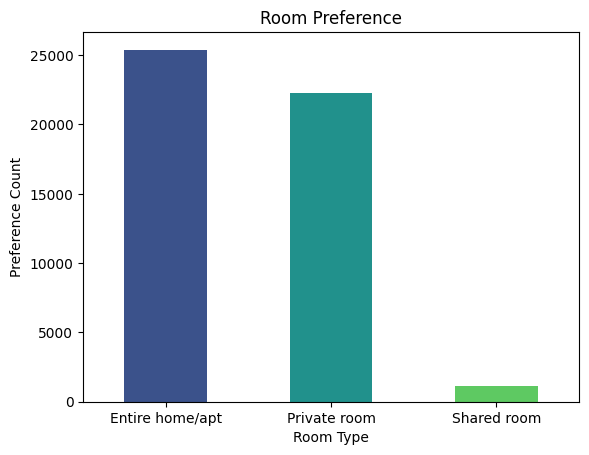

In [37]:
room_pref=df['room_type'].value_counts()
colors=sns.color_palette('viridis',len(room_pref))
room_pref.plot(kind='bar',color=colors)
plt.title("Room Preference")
plt.xlabel("Room Type")
plt.ylabel("Preference Count")
plt.xticks(rotation=0)
plt.show()

In [38]:
new_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,21.0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,38.0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,72.0,1,365


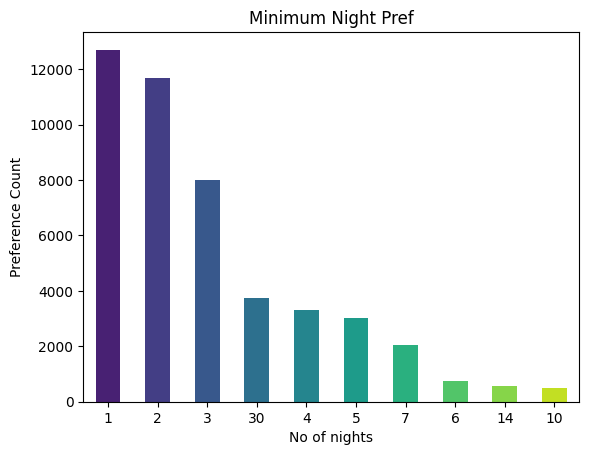

In [39]:
mini_night_prefbytourist=new_df['minimum_nights'].value_counts().head(10)
colors=sns.color_palette('viridis',len(mini_night_prefbytourist))
mini_night_prefbytourist.plot(kind='bar',color=colors)
plt.title("Minimum Night Pref")
plt.xlabel("No of nights")
plt.ylabel("Preference Count")
plt.xticks(rotation=0)
plt.show()

In [40]:
Top10_most_rated_airbnb=new_df[['name', 'number_of_reviews']].sort_values(by='number_of_reviews', ascending=False).head(10)

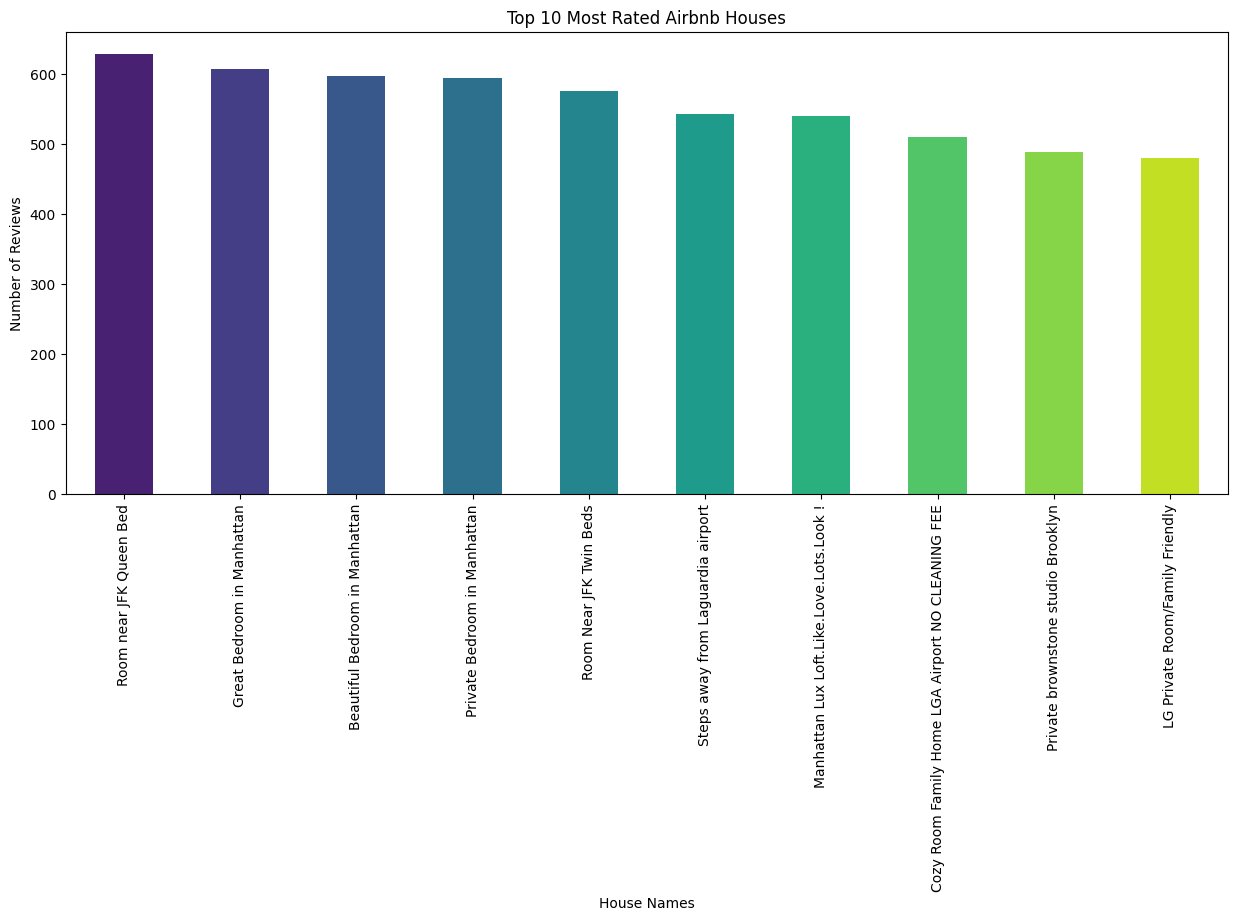

In [41]:
plt.figure(figsize=(15, 6))
colors=sns.color_palette('viridis',len(Top10_most_rated_airbnb))
Top10_most_rated_airbnb['number_of_reviews'].plot(kind='bar',color=colors)
plt.xticks(ticks=range(len(Top10_most_rated_airbnb)), labels=Top10_most_rated_airbnb['name'], rotation=90)
plt.title('Top 10 Most Rated Airbnb Houses')
plt.xlabel('House Names')
plt.ylabel('Number of Reviews')
plt.show()

In [42]:
new_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [43]:
grouped_reviews =new_df.groupby('neighbourhood_group')['number_of_reviews'].sum()

In [44]:
grouped_reviews.sort_values(ascending=False,inplace=True)

In [45]:
grouped_reviews

neighbourhood_group
Brooklyn         486174
Manhattan        454126
Queens           156902
Bronx             28334
Staten Island     11541
Name: number_of_reviews, dtype: int64

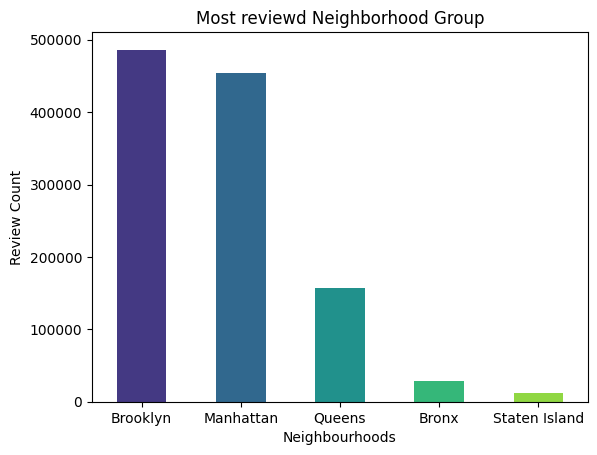

In [46]:
colors=sns.color_palette('viridis',len(grouped_reviews))
grouped_reviews.plot(kind='bar',color=colors)
plt.title('Most reviewd Neighborhood Group')
plt.xlabel("Neighbourhoods")
plt.ylabel("Review Count")
plt.xticks(rotation=0)
plt.show()

In [47]:
room_counts = new_df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

most_used_room_type = room_counts.loc[room_counts.groupby('neighbourhood_group')['count'].idxmax()]

print(most_used_room_type)

   neighbourhood_group        room_type  count
1                Bronx     Private room    652
4             Brooklyn     Private room  10123
6            Manhattan  Entire home/apt  13190
10              Queens     Private room   3370
13       Staten Island     Private room    188


In [49]:
room_counts

,neighbourhood_group,room_type,count
6,Manhattan,Entire home/apt,13190
4,Brooklyn,Private room,10123
3,Brooklyn,Entire home/apt,9553
7,Manhattan,Private room,7973
10,Queens,Private room,3370
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,378


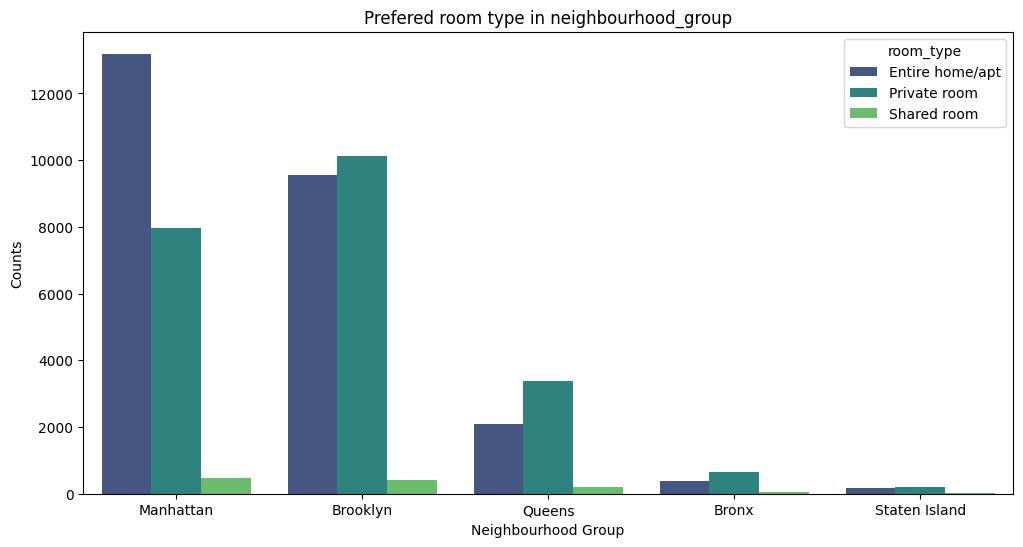

In [48]:
room_counts = new_df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
room_counts = room_counts.sort_values(by='count', ascending=False)
sns.barplot(data=room_counts, x='neighbourhood_group', y='count', hue='room_type', palette='viridis')
plt.title("Prefered room type in neighbourhood_group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Counts")
plt.show()

In [48]:
grouped_reviews_neighborhood=new_df.groupby('neighbourhood')['number_of_reviews'].sum()

In [49]:
grouped_reviews_neighborhood.sort_values(ascending=False,inplace=True)

In [50]:
top_10_reviwed_neighborhoods = grouped_reviews_neighborhood.head(10)

In [51]:
top_10_reviwed_neighborhoods

neighbourhood
Bedford-Stuyvesant    110352
Williamsburg           85427
Harlem                 75927
Bushwick               52508
Hell's Kitchen         49940
East Village           44642
East Harlem            36440
Crown Heights          36408
Upper West Side        36058
Upper East Side        31686
Name: number_of_reviews, dtype: int64

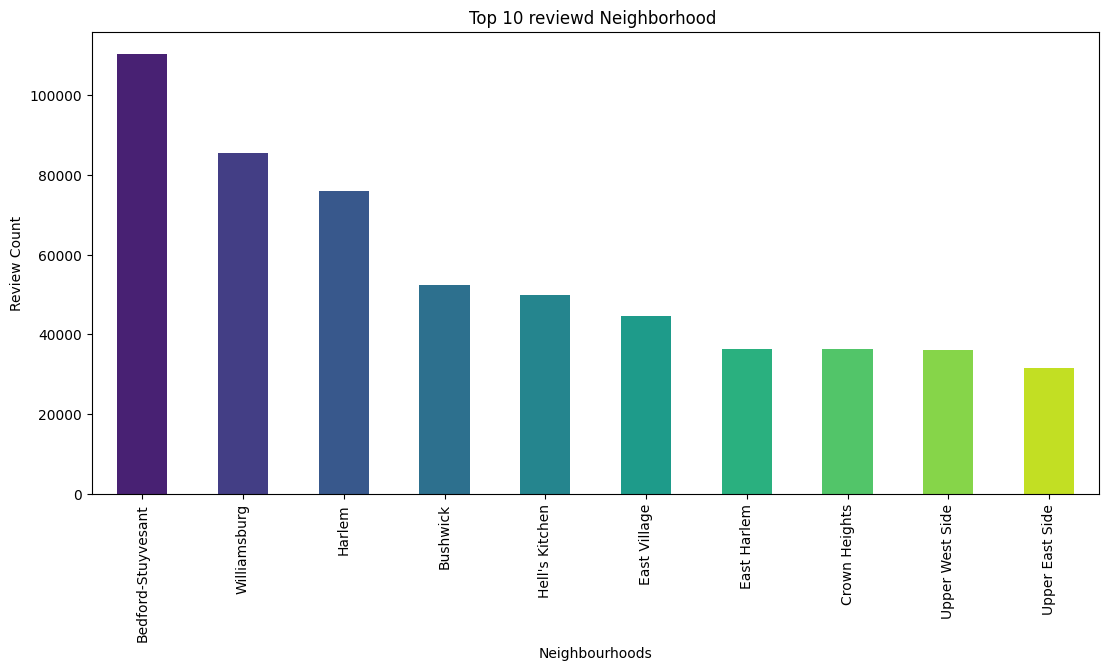

In [52]:
plt.figure(figsize=(13,6))
colors=sns.color_palette('viridis',len(top_10_reviwed_neighborhoods))
top_10_reviwed_neighborhoods.plot(kind='bar',color=colors)
plt.title('Top 10 reviewd Neighborhood ')
plt.xlabel("Neighbourhoods")
plt.ylabel("Review Count")
plt.xticks(rotation=90)
plt.show()

In [53]:
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,21.0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,38.0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,72.0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,353.0,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,10.0,1,0


In [54]:
Top10_mostPricedroom_airbnb=new_df[['name', 'price']].sort_values(by='price', ascending=False).head(10)

In [55]:
Top10_mostPricedroom_airbnb

,name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
9151,Furnished room in Astoria apartment,10000
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
6530,Spanish Harlem Apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4377,Film Location,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),7703
42523,70' Luxury MotorYacht on the Hudson,7500


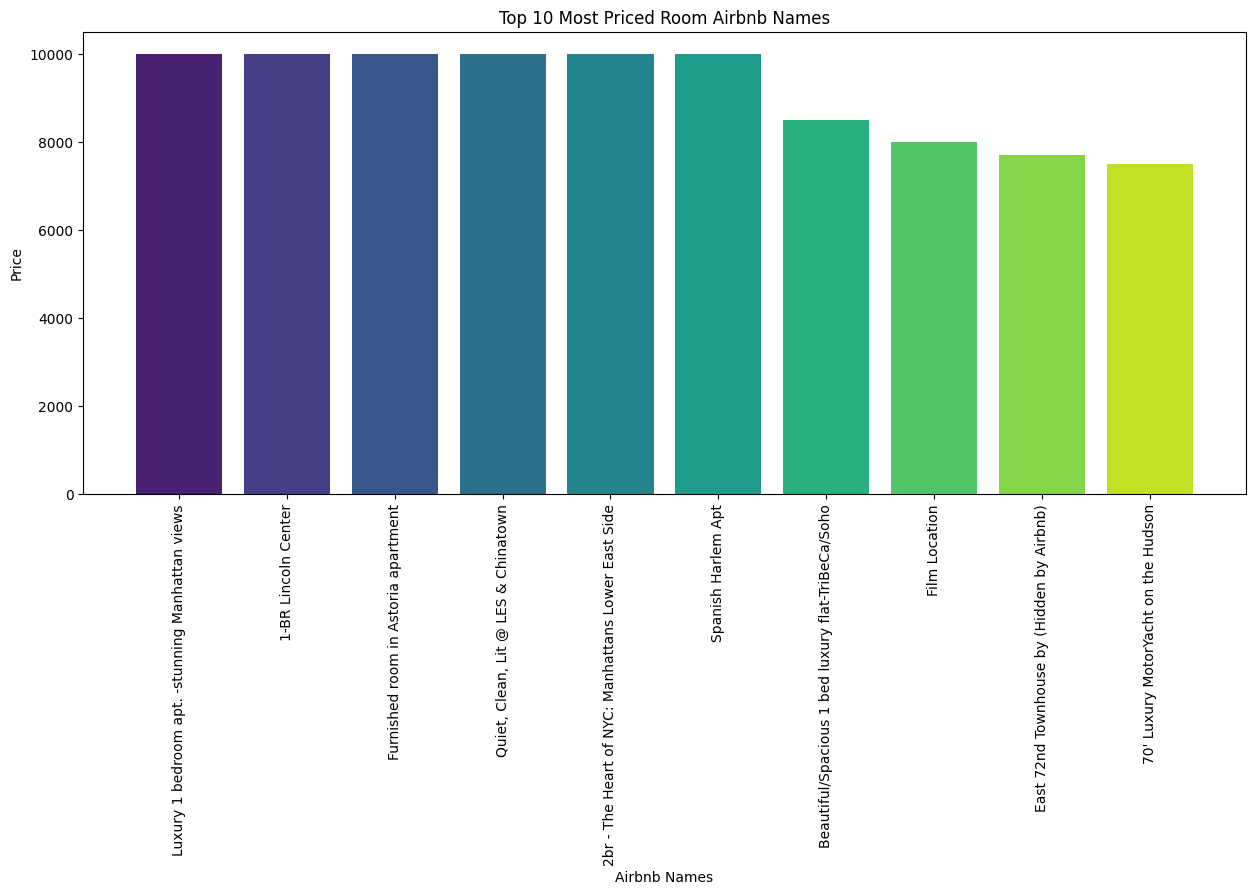

In [56]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('viridis', len(Top10_mostPricedroom_airbnb))
plt.bar(Top10_mostPricedroom_airbnb['name'], Top10_mostPricedroom_airbnb['price'], color=colors)
plt.title('Top 10 Most Priced Room Airbnb Names')
plt.xlabel("Airbnb Names")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


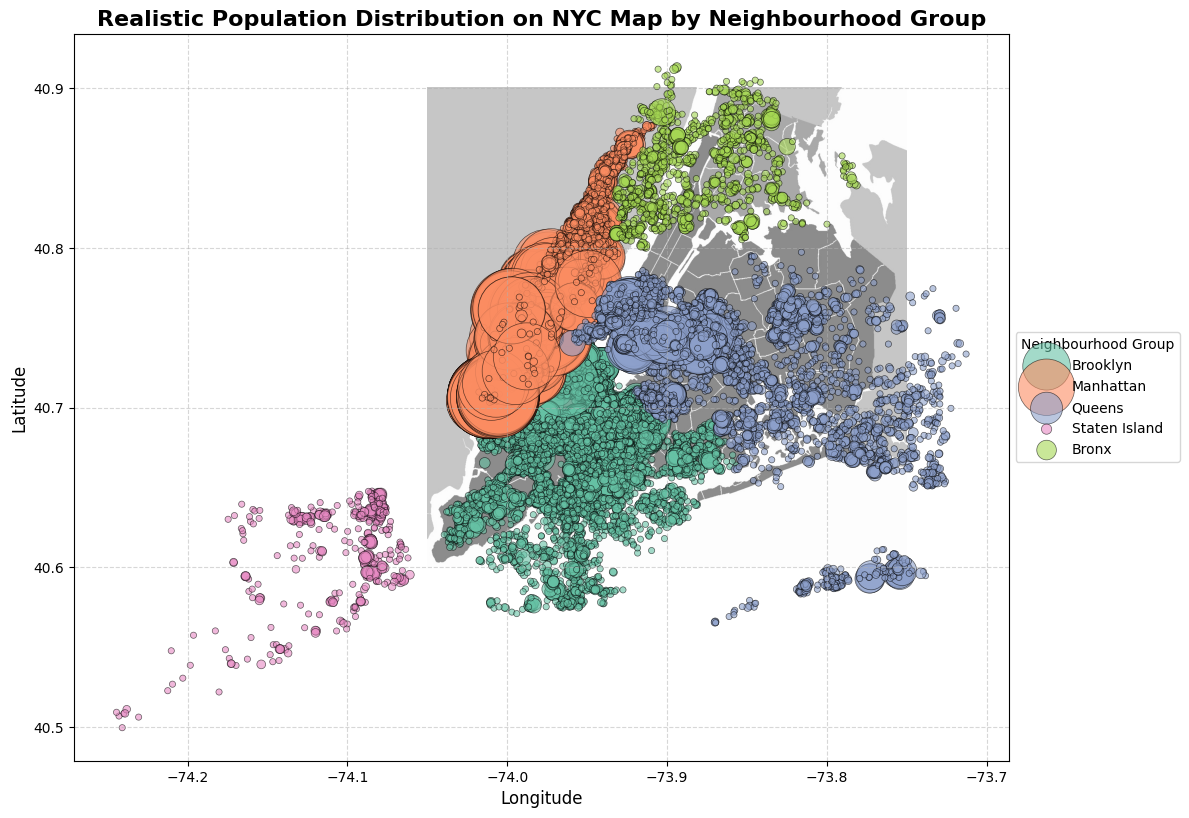

In [59]:
from PIL import Image

neighbourhood_groups = new_df['neighbourhood_group'].unique()
colors = sns.color_palette('Set2', len(neighbourhood_groups)) 
color_map = dict(zip(neighbourhood_groups, colors))

new_df['color'] = new_df['neighbourhood_group'].map(color_map)

img = Image.open("New_York_City_.png")  

fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(img, extent=[-74.05, -73.75, 40.6, 40.9], alpha=0.8)

for group in neighbourhood_groups:
    subset = new_df[new_df['neighbourhood_group'] == group]
    sizes = (subset['calculated_host_listings_count'] + 1) * 10
    ax.scatter(
        subset['longitude'], 
        subset['latitude'], 
        c=subset['color'], 
        s=sizes, 
        label=group, 
        alpha=0.6, 
        edgecolor='k',
        linewidth=0.5
    )

plt.title("Realistic Population Distribution on NYC Map by Neighbourhood Group", fontsize=16, fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title="Neighbourhood Group", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()
